# An Intermarket Approach to Beta Rotation 

Following code tries to replicate referenced trading strategy that, in summary, does the following:

*When a price ratio (or the relative strength) of the Utilities sector to the broad market is positive over the prior 4-week period, position into Utilities for the following week.  When a price ratio (or the relative strength) of the Utilities sector to the broad market is negative over the prior 4-week period, position into the broad market for the following week.*

[*********************100%***********************]  3 of 3 completed


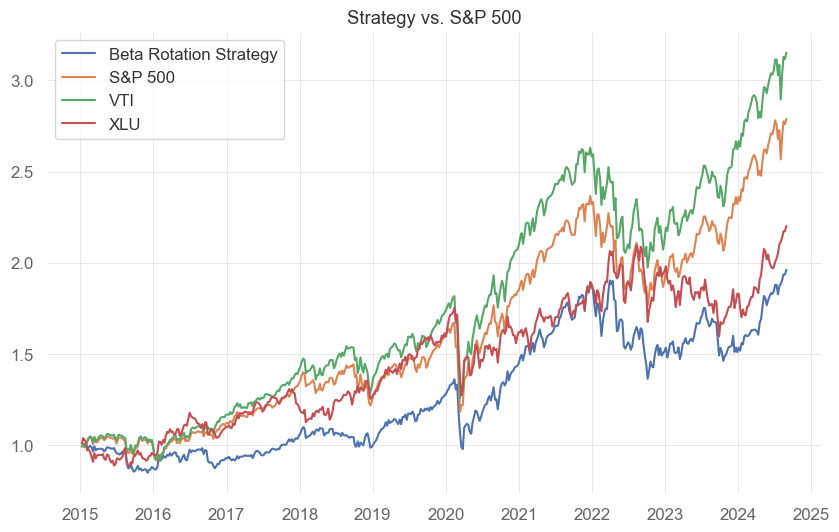

In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quantstats as qs

# Download historical data for the ETFs and benchmark
start_date = '2015-01-01'
end_date = '2024-08-31'
tickers = ['XLU', 'VTI', '^GSPC']  # Utilities, Total Market, SP500
data = yf.download(tickers, start=start_date, end=end_date, interval='1wk')['Adj Close']

# Calculate the 4-week rate of change (momentum)
data['ROC'] = (data['XLU'] / data['VTI']).pct_change(periods=4)

# Generate the trading signal: 1 for XLU (Utilities), 0 for VTI (Broad Market)
data['Signal'] = np.where(data['ROC'] > 0, 1, 0)

# Shift the signal to avoid lookahead bias
data['Signal'] = data['Signal'].shift(1)

# Strategy returns: invest in XLU if Signal == 1, else VTI
data['Strategy_Returns'] = np.where(data['Signal'] == 1, data['XLU'].pct_change(), data['VTI'].pct_change())

# Add transaction costs (0.1% assumed)
data['Transaction_Costs'] = data['Signal'].diff().abs() * 0.000
data['Net_Strategy_Returns'] = data['Strategy_Returns'] - data['Transaction_Costs']

# Cumulative returns
data['Strategy_Cumulative'] = (1 + data['Net_Strategy_Returns']).cumprod()
data['SP500_Cumulative'] = (1 + data['^GSPC'].pct_change()).cumprod()
data['VTI_Cumulative'] = (1 + data['VTI'].pct_change()).cumprod()
data['XLU_Cumulative'] = (1 + data['XLU'].pct_change()).cumprod()

# Calculate S&P 500 returns
data['SP500_Returns'] = data['^GSPC'].pct_change()
data = data.tz_localize(None)

# Plot cumulative returns vs SP500
plt.figure(figsize=(10, 6))
plt.plot(data['Strategy_Cumulative'], label='Beta Rotation Strategy')
plt.plot(data['SP500_Cumulative'], label='S&P 500')
plt.plot(data['VTI_Cumulative'], label='VTI')
plt.plot(data['XLU_Cumulative'], label='XLU')
plt.title('Strategy vs. S&P 500')
plt.legend()
plt.show()

In [23]:
qs.reports.html(data['Net_Strategy_Returns'],benchmark=data['SP500_Returns'],output='../reports/02 - intermarket_approach_beta_rotation.html')

C:\Users\sandr\Documents\GitHub\portfolio_strategies_management\venv\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\sandr\Documents\GitHub\portfolio_strategies_management\venv\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\sandr\Documents\GitHub\portfolio_strategies_management\venv\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over bot